## Credit Card Fraud Detection

Predict fraudulent credit card transactions with the help of Machine learning models. 

Import the following libraries to get started.

` the notebook was created on Google Colab, with the latest sklearn packages`

In [0]:
import numpy as np
import pandas as pd
import time


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [6]:
# to run on Google Colab

#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
df = pd.read_csv('creditcard.csv')

# use below file on gogle drive to run on Google Colab
#df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("normal_share=",normal_share,"            ","fraud_share=",fraud_share)

imbalance= (fraud_share/normal_share)*100
print('Imbalance Percentage = ' + str(imbalance))

normal_share= 99.82725143693798              fraud_share= 0.1727485630620034
Imbalance Percentage = 0.173047500131896


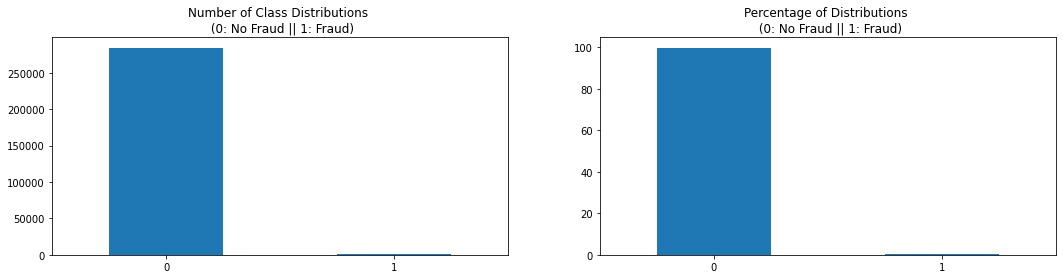

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig, ax = plt.subplots(1, 2, figsize=(18,4))

classes.plot(kind='bar', rot=0, ax=ax[0])
ax[0].set_title('Number of Class Distributions \n (0: No Fraud || 1: Fraud)')

(classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
ax[1].set_title('Percentage of Distributions \n (0: No Fraud || 1: Fraud)')

plt.show()

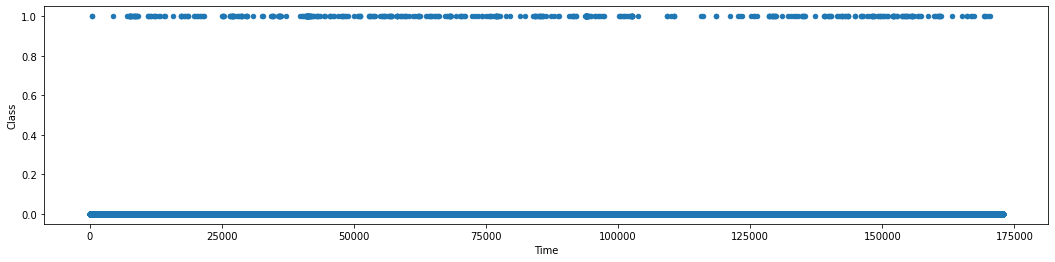

In [11]:
# Create a scatter plot to observe the distribution of classes with time
df.plot.scatter(y='Class', x='Time',figsize=(18,4))

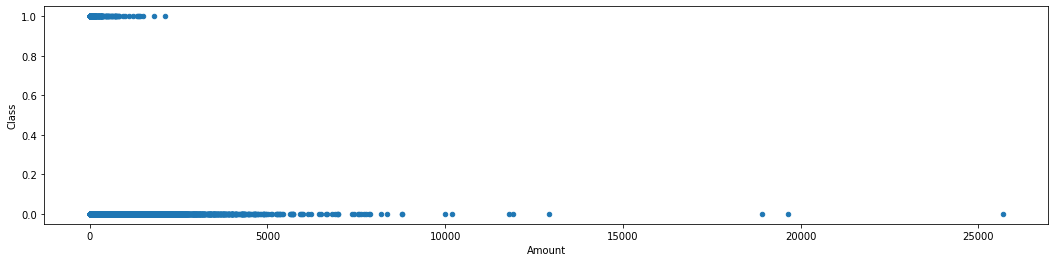

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
df.plot.scatter(y='Class', x='Amount',figsize=(18,4))

In [13]:
# Drop unnecessary columns
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data


In [0]:
y= df['Class']
X= df.loc[:, df.columns != 'Class']

In [0]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, train_size = 0.7, test_size = 0.3, 
                                                                    random_state = 42, stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

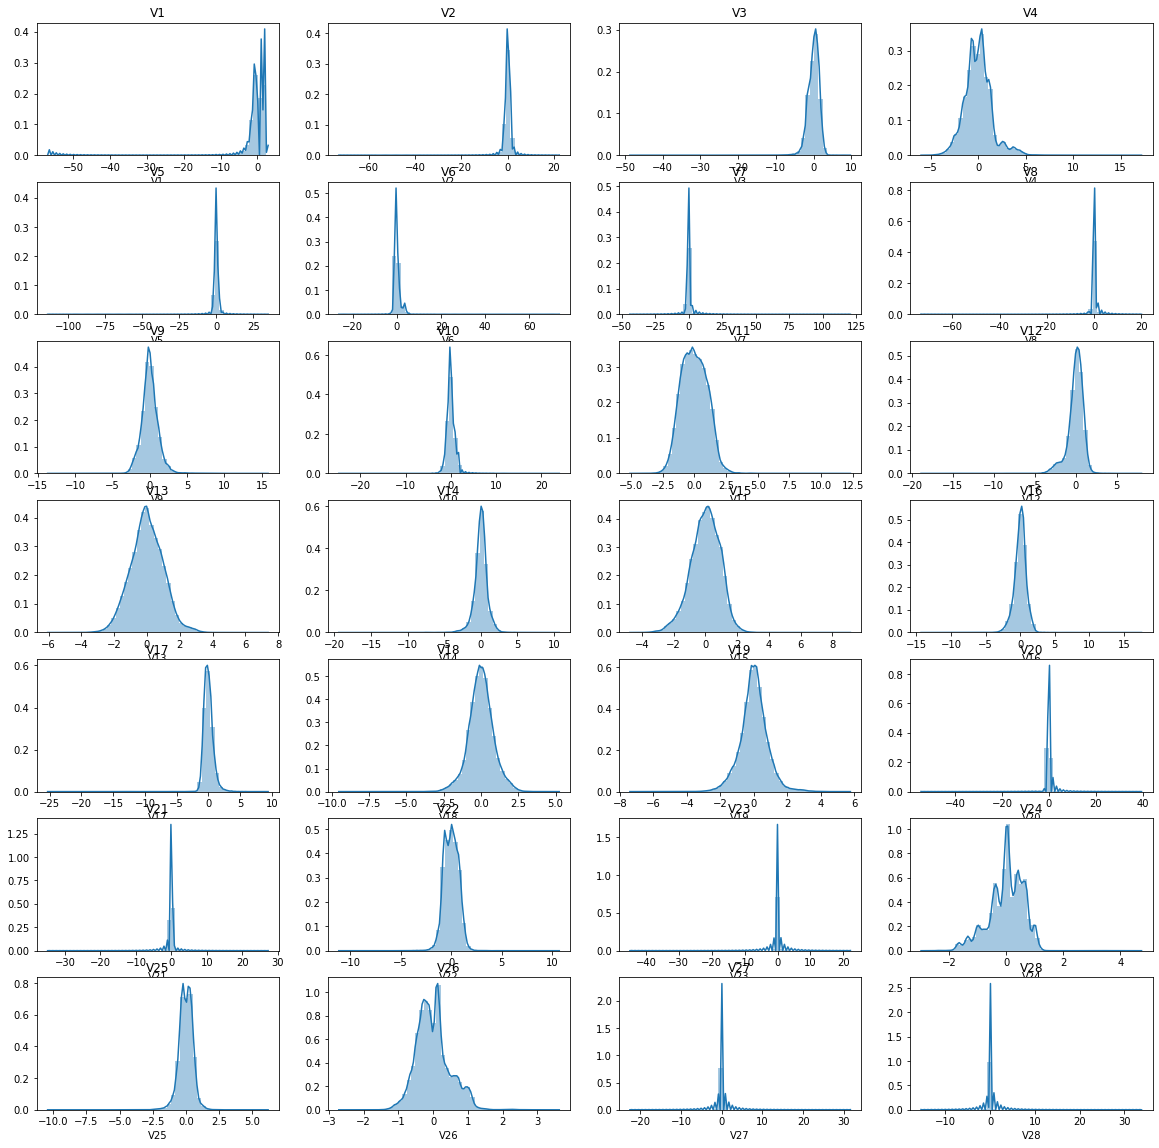

In [17]:
# plot the histogram of a variable from the dataset to see the skewness

k=0
fig, ax = plt.subplots(7, 4, figsize=(20,20))
for i in range(7):
    for j in range(4):
        k=k+1
        sns.distplot(X_train['V'+str(k)], ax=ax[i][j])
        ax[i][j].set_title('V'+str(k))
       

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [0]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
pt.fit(X_train)                       

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [19]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(199364, 29)
(199364,)


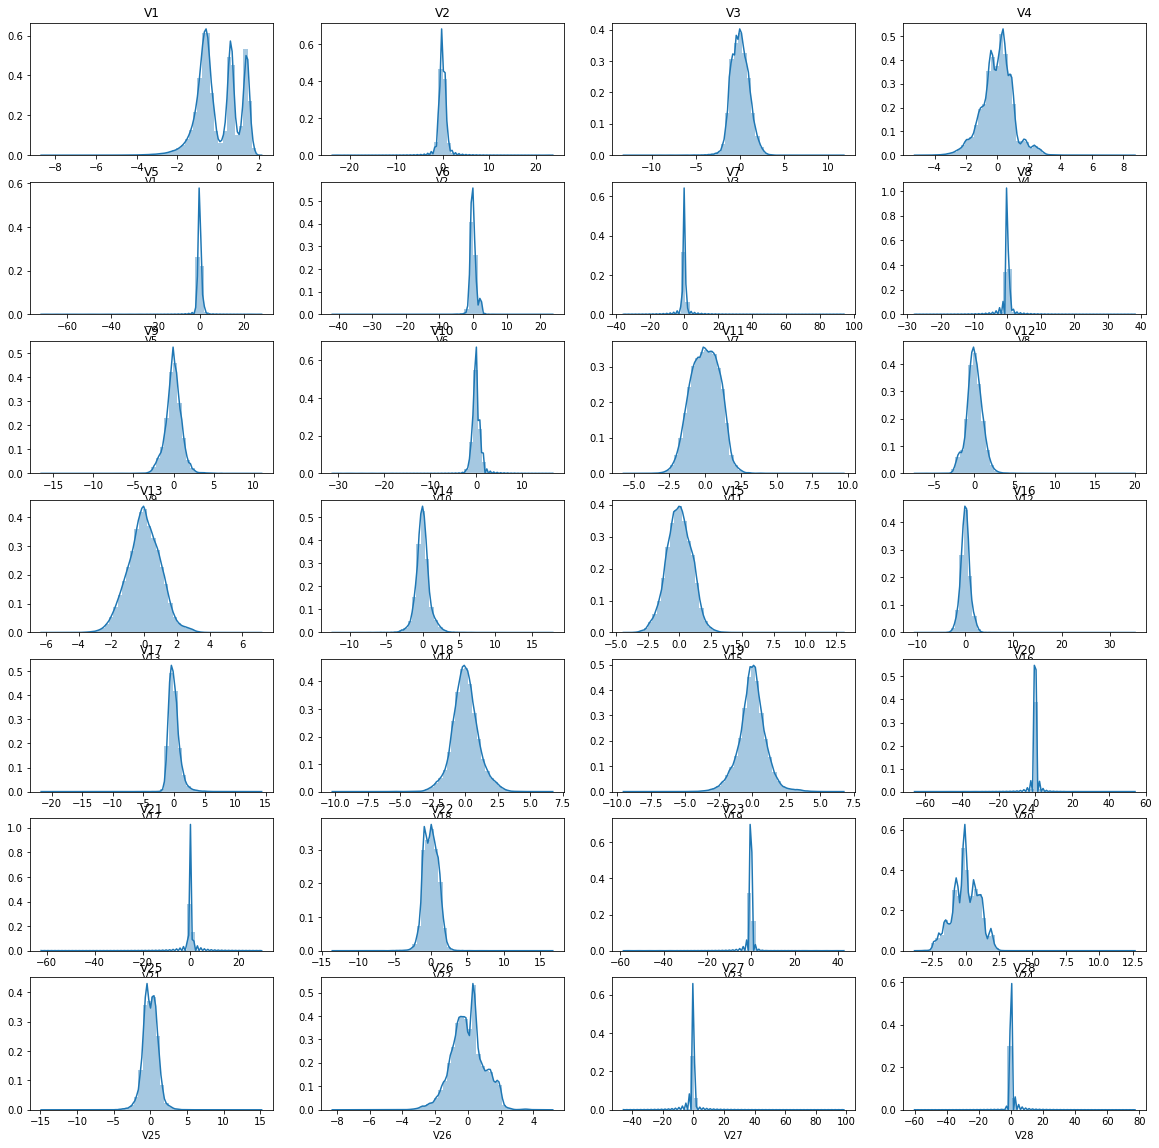

In [0]:
# plot the histogram of a variable from the dataset again to see the result 
X_train_pt_df = pd.DataFrame(X_train_pt,columns=X_train.columns)
k=0
fig, ax = plt.subplots(7, 4, figsize=(20,20))
for i in range(7):
    for j in range(4):
        k=k+1
        sns.distplot(X_train_pt_df['V'+str(k)], ax=ax[i][j])
        ax[i][j].set_title('V'+str(k))

## Model Building on Imbalanced dataset
Build different models on the imbalanced dataset and see the result

1. Logistic Regression
2. KNN
3. SVM
4. Decision Tree
5. Random Forest
6. XGBoost

In [0]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score

Create Stratified Cross Validation Scheme


In [0]:
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

#perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [0]:
print("Logistic Regression Classifier: --------------------------")
for c in [0.01, 0.1, 1, 10]:
    print("C=",c, "Penalty= l2")
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2',C=c)
        logreg_classifier.fit(X_train_cv,y_train_cv)

        y_test_pred= logreg_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)

Logistic Regression Classifier: --------------------------
C= 0.01 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.981995637510146
C= 0.1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9818158783531294
C= 1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  664

Hyperparameter Tuning of Models to find best models

In [0]:
print("KNN Classifier: --------------------------")
for n_neighbor in [3,5,7]:
    print("n_neighbors=",n_neighbor)
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        knn_classifier= KNeighborsClassifier(n_neighbors=n_neighbor)
        knn_classifier.fit(X_train_cv,y_train_cv)

        y_test_pred= knn_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)

KNN Classifier: --------------------------
n_neighbors= 3
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9228273553762022
n_neighbors= 5
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9286066276624262
n_neighbors= 7
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 13932

In [0]:
print("SVM  Classifier: --------------------------")
for c in [1,2,3]:
    for gamma in ['auto','scale']:
        print("C=",c,"gamma=",gamma)
        cv_score_mean=0
        for train_index, test_index in skf.split(X_train_pt, y_train_pt):
            print("Train:", train_index, "Test:", test_index)
            X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
            y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

            svm_classifier= svm.SVC(C=c,gamma=gamma, probability=True)
            svm_classifier.fit(X_train_cv,y_train_cv)

            y_test_pred= svm_classifier.predict_proba(X_test_cv)
            cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
            cv_score_mean=cv_score_mean+cv_score
        print("ROC-AUC Score=", cv_score_mean/3)

SVM  Classifier: --------------------------
C= 1 gamma= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9612595957414826
C= 1 gamma= scale
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9612707215776833
C= 2 gamma= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 1381

In [0]:
print("Decision Trees Classifier: --------------------------")
for min_samples_split in [10, 5, 2]:
    for min_samples_leaf in [10, 5, 1]:
        for max_features in ['auto','sqrt','log2',None]:
            print("min_samples_split=",min_samples_split, "min_samples_leaf=",min_samples_leaf,"max_features=",max_features)
            cv_score_mean=0
            for train_index, test_index in skf.split(X_train_pt, y_train_pt):
                print("Train:", train_index, "Test:", test_index)
                X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
                y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

                dt_classifier= DecisionTreeClassifier(min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      max_features=max_features)
                dt_classifier.fit(X_train_cv,y_train_cv)

                y_test_pred= dt_classifier.predict_proba(X_test_cv)
                cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
                cv_score_mean=cv_score_mean+cv_score
            print("ROC-AUC Score=", cv_score_mean/3)

Decision Trees Classifier: --------------------------
min_samples_split= 10 min_samples_leaf= 10 max_features= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.90645179016387
min_samples_split= 10 min_samples_leaf= 10 max_features= sqrt
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9166090901098065
min_samples_split= 10 min_samples_leaf= 10 max_features= log2
Train: [ 66445  66446  66447 ... 199361 199362 19936

In [0]:
print("Random Forest Classifier: --------------------------")
for n_estimators in [100,150,200]:
    for min_samples_leaf in [10,5,1]:
        for max_features in ['auto','sqrt','log2',None]:
            print("n_estimators=",n_estimators, "min_samples_leaf=",min_samples_leaf,"max_features=",max_features)
            cv_score_mean=0
            for train_index, test_index in skf.split(X_train_pt, y_train_pt):
                print("Train:", train_index, "Test:", test_index)
                X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
                y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

                rf_classifier= RandomForestClassifier(n_estimators=n_estimators,
                                                      min_samples_leaf=min_samples_leaf,
                                                      max_features=max_features, n_jobs=-1)
                rf_classifier.fit(X_train_cv,y_train_cv)

                y_test_pred= rf_classifier.predict_proba(X_test_cv)
                cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
                cv_score_mean=cv_score_mean+cv_score
            print("ROC-AUC Score=", cv_score_mean/3)

Random Forest Classifier: --------------------------
n_estimators= 100 min_samples_leaf= 10 max_features= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9641645838061881
n_estimators= 100 min_samples_leaf= 10 max_features= sqrt
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9627572506119039
n_estimators= 100 min_samples_leaf= 10 max_features= log2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [ 

In [0]:
print("XGBOOST Classifier: --------------------------")
for learning_rate in [0.2,0.6]:
    for subsample in [0.3, 0.6, 0.9]:
        print("learning_rate=",learning_rate, "subsample=",subsample)
        cv_score_mean=0
        for train_index, test_index in skf.split(X_train_pt, y_train_pt):
            print("Train:", train_index, "Test:", test_index)
            X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
            y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

            xgboost_classifier= XGBClassifier(n_estimators=200,
                                            learning_rate=learning_rate,
                                            subsample=subsample, n_jobs=-1)
            xgboost_classifier.fit(X_train_cv,y_train_cv)

            y_test_pred= xgboost_classifier.predict_proba(X_test_cv)
            cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
            cv_score_mean=cv_score_mean+cv_score
        print("ROC-AUC Score=", cv_score_mean/3)

XGBOOST Classifier: --------------------------
learning_rate= 0.2 subsample= 0.3
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9752423034194786
learning_rate= 0.2 subsample= 0.6
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9792456802634971
learning_rate= 0.2 subsample= 0.9
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 19936

### Cross Validation ROC-AUC Score of the models and best hyperparameters on Imbalanced data

*   LogisticRegression(penalty='l2',C=0.01) = 0.981995637510146
*   KNeighborsClassifier(n_neighbors=7) = 0.9300266801223783
* svm.SVC(C=1,gamma='auto', probability=True) = 0.9612595957414826
*   DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=10,max_features=None) = 0.9269609164616767
* RandomForestClassifier(n_estimators=150,                                                  min_samples_leaf=10,                                         max_features='log2')=0.9693891396983281
*XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=0.6, n_jobs=-1) =0.9792456802634971









#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [0]:
#initialise the model with optimum hyperparameters
clf = linear_model.LogisticRegression(penalty='l2',C=0.01)  
clf.fit(X_train, y_train)
#predict on test to give probability
y_pred= clf.predict_proba(X_test)
#calculate the ROC-AUC
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("LogisticRegression ROC-AUC Score =", score)


clf = KNeighborsClassifier(n_neighbors=7)  
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("KNeighbors Classifier ROC-AUC Score =", score)

clf = svm.SVC(C=1,gamma='auto', probability=True)  
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("SVM Classifier ROC-AUC Score =", score)

clf = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=10,max_features=None)   
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("Decision Tree Classifier ROC-AUC Score =", score)

clf = RandomForestClassifier(n_estimators=150, min_samples_leaf=10, max_features='log2')  
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("Random Forest Classifier ROC-AUC Score =", score)

clf = XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=0.6, n_jobs=-1) 
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("XGBOOST Classifier ROC-AUC Score =", score)

LogisticRegression ROC-AUC Score = 0.9559039137619358
KNeighbors Classifier ROC-AUC Score = 0.8815301188403364
SVM Classifier ROC-AUC Score = 0.9461612559273618
Decision Tree Classifier ROC-AUC Score = 0.9118161452383857
Random Forest Classifier ROC-AUC Score = 0.9453019171935875
XGBOOST Classifier ROC-AUC Score = 0.9737185966668938


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 12


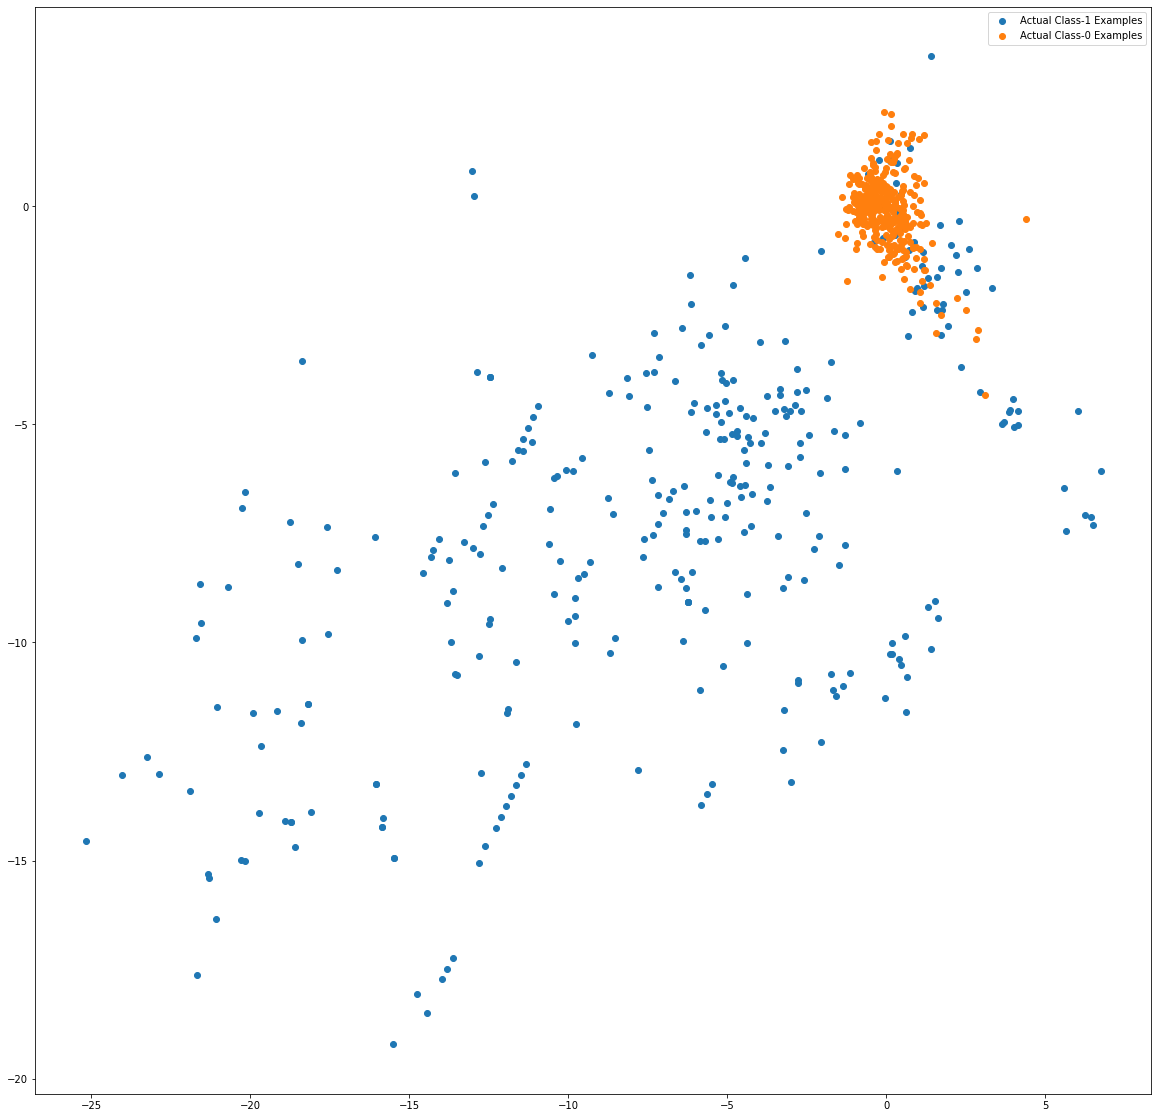

In [0]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling
- Build different models on the balanced dataset and see the result

In [0]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [0]:
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

#perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [0]:
print("Logistic Regression Classifier: --------------------------")
for c in [0.01, 0.1, 1]:
    print("C=",c, "Penalty= l2")
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
        X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

        logreg_classifier = linear_model.LogisticRegression(penalty='l2',C=c)
        logreg_classifier.fit(X_ros_cv,y_ros_cv)

        y_test_pred= logreg_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)


Logistic Regression Classifier: --------------------------
C= 0.01 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9786819703350383
C= 0.1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9777272755495061
C= 1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66

Check the improvement in cross validation ROC-AUC score of other models


In [0]:
print("KNN Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    knn_classifier= KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
    knn_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= knn_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

KNN Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9299831290025934


In [0]:
print("SVM  Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    svm_classifier= svm.SVC(C=1,gamma='auto', probability=True)
    svm_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= svm_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

SVM  Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]


In [0]:
print("Decision Trees Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    dt_classifier= DecisionTreeClassifier(min_samples_split=2,
                                        min_samples_leaf=10,
                                        max_features=None)
    dt_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= dt_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

Decision Trees Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.8994711914467848


In [0]:
print("Random Forest Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    rf_classifier= RandomForestClassifier(n_estimators=150,
                                        min_samples_leaf=10,
                                        max_features='log2', n_jobs=-1)
    rf_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= rf_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

Random Forest Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9653169027471836


In [0]:
print("XGBOOST Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    xgboost_classifier= XGBClassifier(n_estimators=200,
                                    learning_rate=0.2,
                                    subsample=0.6, n_jobs=-1)
    xgboost_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= xgboost_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

XGBOOST Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9795906252613396


### Cross Validation ROC-AUC Score after Random Oversampling 
* LogisticRegression(penalty='l2',C=0.01) = 0.9786819703350383
* KNeighborsClassifier(n_neighbors=7) = 0.9299831290025934
* svm.SVC(C=1,gamma='auto', probability=True) = `Not computed due to large training time`
* DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=10,max_features=None) = 0.8994711914467848
* RandomForestClassifier(n_estimators=150, min_samples_leaf=10, max_features='log2')=0.9653169027471836
* XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=0.6, n_jobs=-1) =0.9795906252613396

All the models score decreased after Random Oversampling. Only XGBOOST score increases after Oversampling.

### Print the class distribution after applying SMOTE 

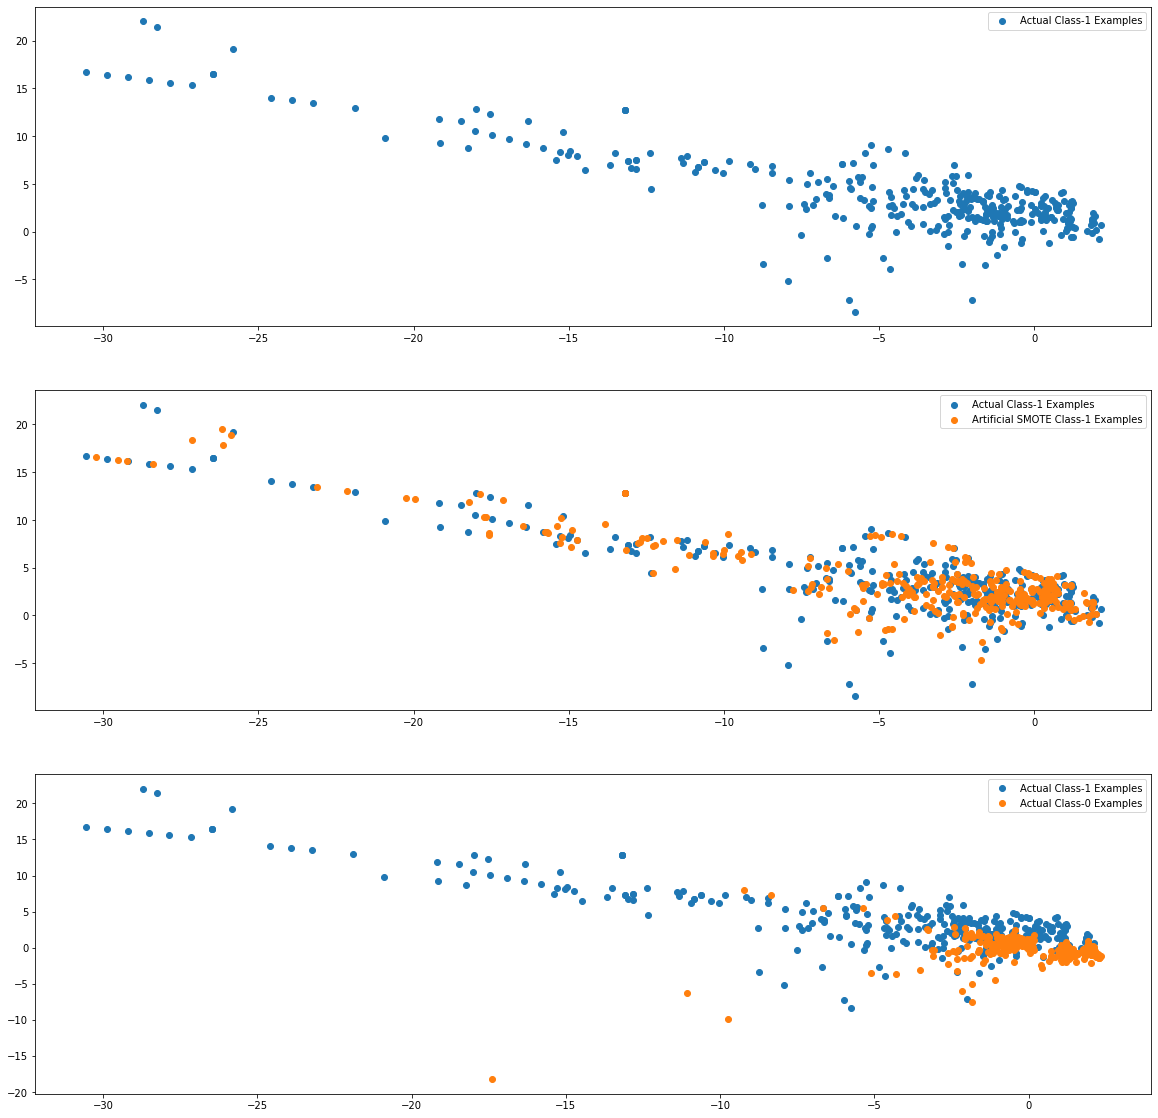

In [0]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [0]:
print("Logistic Regression Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    logreg_classifier = linear_model.LogisticRegression(penalty='l2',C=0.01)
    logreg_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= logreg_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("KNN Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    knn_classifier= KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
    knn_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= knn_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("Decision Trees Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    dt_classifier= DecisionTreeClassifier(min_samples_split=2,
                                        min_samples_leaf=10,
                                        max_features=None)
    dt_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= dt_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("Random Forest Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    rf_classifier= RandomForestClassifier(n_estimators=150,
                                        min_samples_leaf=10,
                                        max_features='log2', n_jobs=-1)
    rf_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= rf_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("XGBOOST Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    xgboost_classifier= XGBClassifier(n_estimators=200,
                                    learning_rate=0.2,
                                    subsample=0.6, n_jobs=-1)
    xgboost_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= xgboost_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("SVM  Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    svm_classifier= svm.SVC(C=1,gamma='auto', probability=True)
    svm_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= svm_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)
  

Logistic Regression Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9767161835173893
KNN Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9442219242710334
Decision Trees Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ..

### Cross Validation ROC-AUC Score after SMOTE 
* LogisticRegression(penalty='l2',C=0.01) = 0.9767161835173893
* KNeighborsClassifier(n_neighbors=7) = 0.9442219242710334
* svm.SVC(C=1,gamma='auto', probability=True) = `Not computed due to large training time`
* DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=10,max_features=None) = 0.9187106612638388
* RandomForestClassifier(n_estimators=150, min_samples_leaf=10, max_features='log2')=0.9824563994388676
* XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=0.6, n_jobs=-1) =0.0.9743278979662436

All the models score `Increased` after SMOTE. Only Logistic Regression score decreases after SMOTE.

### Print the class distribution after applying ADASYN

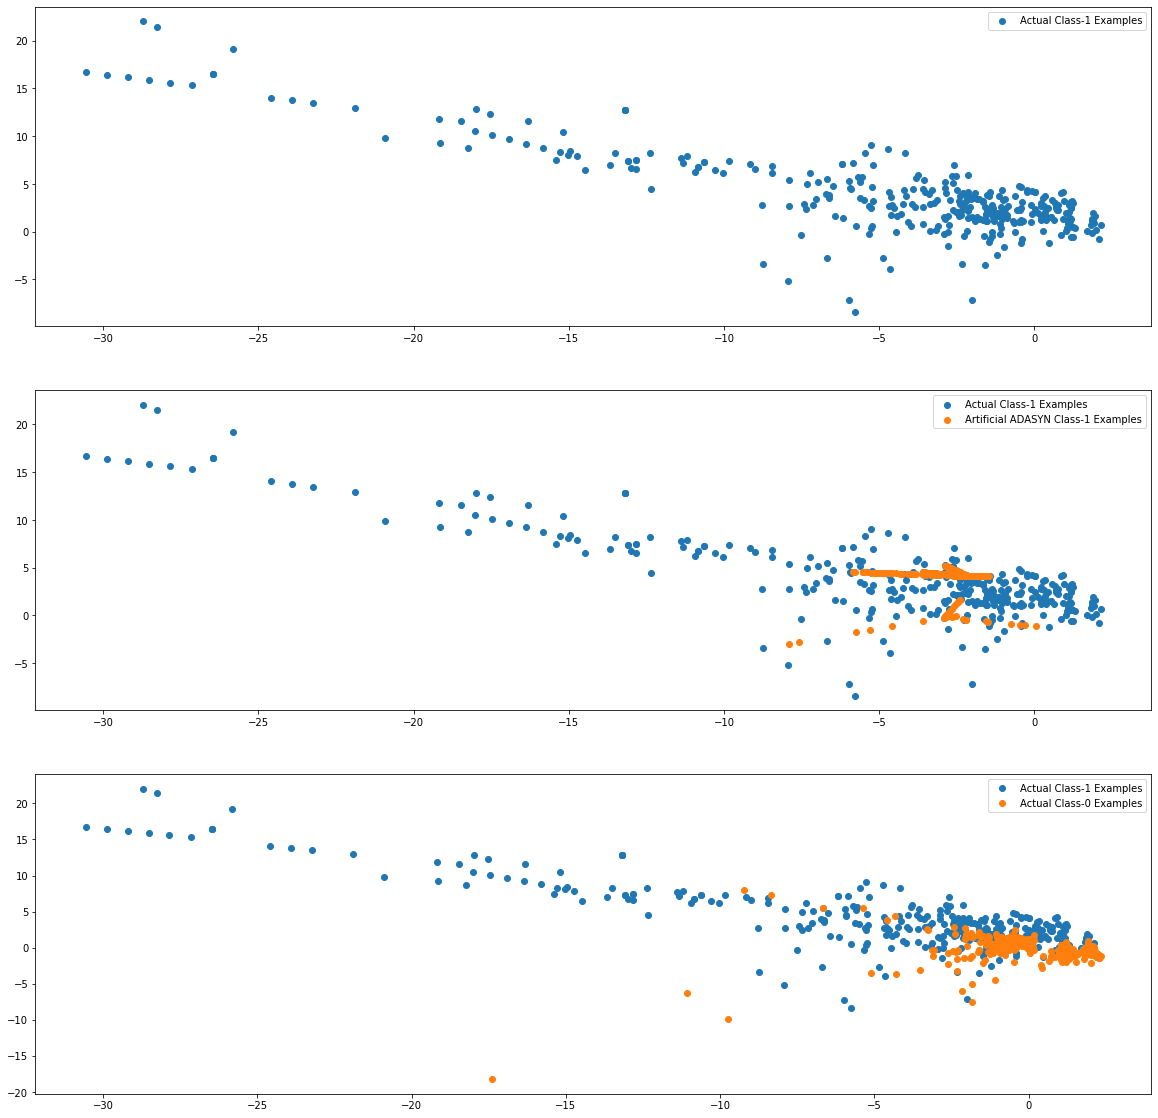

In [0]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [0]:
print("Logistic Regression Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.ADASYN(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    logreg_classifier = linear_model.LogisticRegression(penalty='l2',C=0.01)
    logreg_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= logreg_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("KNN Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.ADASYN(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    knn_classifier= KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
    knn_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= knn_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("Decision Trees Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.ADASYN(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    dt_classifier= DecisionTreeClassifier(min_samples_split=2,
                                        min_samples_leaf=10,
                                        max_features=None)
    dt_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= dt_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("Random Forest Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.ADASYN(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    rf_classifier= RandomForestClassifier(n_estimators=150,
                                        min_samples_leaf=10,
                                        max_features='log2', n_jobs=-1)
    rf_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= rf_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("XGBOOST Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.ADASYN(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    xgboost_classifier= XGBClassifier(n_estimators=200,
                                    learning_rate=0.2,
                                    subsample=0.6, n_jobs=-1)
    xgboost_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= xgboost_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("SVM  Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.ADASYN(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    svm_classifier= svm.SVC(C=1,gamma='auto', probability=True)
    svm_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= svm_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

Logistic Regression Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9735984516349793
KNN Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9442031624295432
Decision Trees Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ..

### Cross Validation ROC-AUC Score after ADASYN
* LogisticRegression(penalty='l2',C=0.01) = 0.9735984516349793
* KNeighborsClassifier(n_neighbors=7) = 0.9442031624295432
* svm.SVC(C=1,gamma='auto', probability=True) = `Not computed due to large training time`
* DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=10,max_features=None) = 0.9129774246209171
* RandomForestClassifier(n_estimators=150, min_samples_leaf=10, max_features='log2')=0.9791655588355481
* XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=0.6, n_jobs=-1) =0.0.9716583354163855

All the models score `Increased` after ADASYN . Only Logistic Regression and XGBOOST score decreases after ADASYN.

### Select the oversampling method which shows the best result on a model

### Random Oversampling best models
* LogisticRegression
* XGBClassifier

### SMOTE best models
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier

### Use the best models to Predict on the test dataset

In [0]:
# perform the best oversampling method on X_train & y_train

#initialise the model with optimum hyperparameters
clf = linear_model.LogisticRegression(penalty='l2',C=0.01)
#oversampling method 
ros = over_sampling.RandomOverSampler(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
#predict on test to give probability
y_pred= clf.predict_proba(X_test)
#calculate the ROC-AUC
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("LogisticRegression ROC-AUC Score =", score)

clf = KNeighborsClassifier(n_neighbors=7)  
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("KNeighbors Classifier ROC-AUC Score =", score)

clf = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=10,max_features=None)   
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("Decision Tree Classifier ROC-AUC Score =", score)

clf = RandomForestClassifier(n_estimators=150, min_samples_leaf=10, max_features='log2')  
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("Random Forest Classifier ROC-AUC Score =", score)

LogisticRegression ROC-AUC Score = 0.969570552438833
KNeighbors Classifier ROC-AUC Score = 0.9146356128095973
Decision Tree Classifier ROC-AUC Score = 0.9041452716565562
Random Forest Classifier ROC-AUC Score = 0.9733202969661732


Best Model is XGBOOST CLassifier with Random Oversampling

In [21]:
clf = XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=0.6, n_jobs=-1) 
ros = over_sampling.RandomOverSampler(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test.values)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("XGBOOST Classifier ROC-AUC Score =", score)

XGBOOST Classifier ROC-AUC Score = 0.9759980069171699


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 4


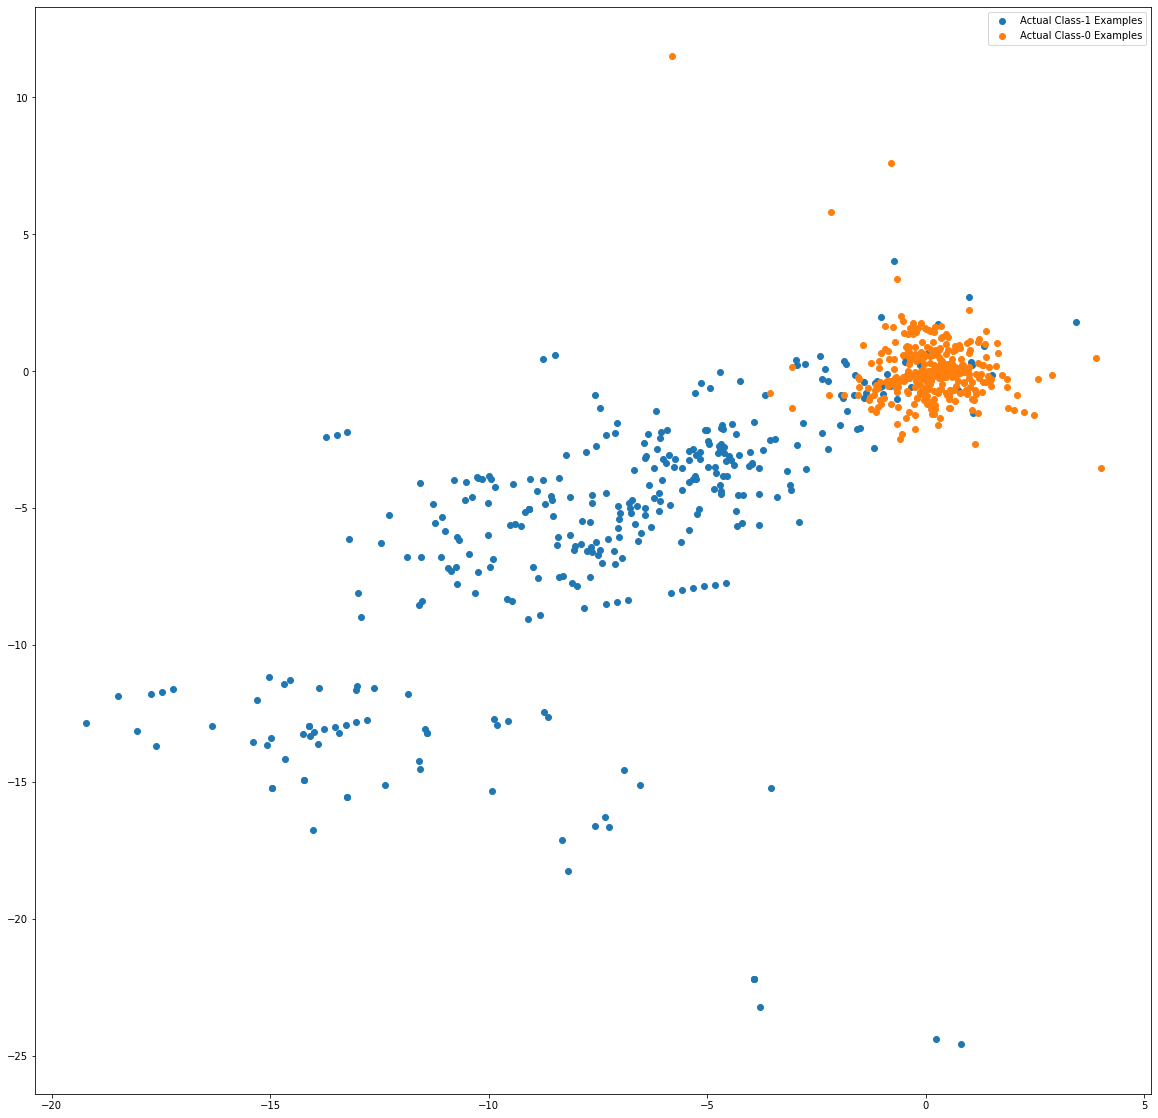

In [0]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## To choose the best threshold

Create a data frame with columns "actual_label" and "predicted_prob" on training data

In [24]:
y_train_pred= clf.predict_proba(X_train.values)
y_df = pd.DataFrame({'actual_label':y_train, 'predicted_prob':y_train_pred[:,1]})
y_df.head()

,actual_label,predicted_prob
249927,0,0.000001
214082,0,0.000010
106005,0,0.000079
58619,0,0.000002
191638,0,0.000008


In [26]:
# find the best threshold best on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.98730916


In [29]:
# Let's create columns with different probability cutoffs 
thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

,actual_label,predicted_prob,0.99,0.988,0.987,0.986,0.98,0.97,0.9,0.8,0.9875
249927,0,0.000001,0,0,0,0,0,0,0,0,0
214082,0,0.000010,0,0,0,0,0,0,0,0,0
106005,0,0.000079,0,0,0,0,0,0,0,0,0
58619,0,0.000002,0,0,0,0,0,0,0,0,0
191638,0,0.000008,0,0,0,0,0,0,0,0,0


In [32]:
# calculate Precision and Recall  for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','precision','recall'])
from sklearn.metrics import confusion_matrix

thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    cm = metrics.confusion_matrix(y_df.actual_label, y_df[i])
    total=sum(sum(cm))
    precision = cm[1,1]/(cm[1,1]+cm[0,1])
    recall =  cm[1,1]/(cm[1,1]+cm[1,0])

    cutoff_df.loc[i] =[ i ,precision,recall]
print(cutoff_df)

          prob  precision    recall
0.9900  0.9900   0.994186  0.994186
0.9880  0.9880   0.994203  0.997093
0.9875  0.9875   0.994203  0.997093
0.9870  0.9870   0.994220  1.000000
0.9860  0.9860   0.991354  1.000000
0.9800  0.9800   0.991354  1.000000
0.9700  0.9700   0.985673  1.000000
0.9000  0.9000   0.974504  1.000000
0.8000  0.8000   0.945055  1.000000


In [33]:
# f1 = (2*precision*recall)/(precision+recall)
f1 = (2*0.994203*0.997093)/(0.994203+0.997093)
print(f1)

0.9956459028481953


The Threshold of "0.9880" gives a Precision of 99.42% and F1 Score of 99.56% on Training data. Let see these scores on test


In [35]:
y_test_pred= clf.predict_proba(X_test.values)
y_df = pd.DataFrame({'actual_label':y_test, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.9880 else 0)
y_df.head()

,actual_label,predicted_prob,predicted_label
186882,0,6.687611e-07,0
165754,0,4.484114e-05,0
235285,0,6.216135e-03,0
101271,0,6.321491e-05,0
5832,0,7.325463e-05,0


In [37]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Precision: 0.9727272727272728
Recall: 0.722972972972973
F1 Score: 0.8294573643410853


We will use this threshold as High Precision is good in predicting "Actual possitives as True Possitives". Thus helping the bank in not wasting resources identifying a fraud.
